# Classification using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Activation, Input

In [4]:
# Tom and Jerry
# Tom: image 1 image 2
# jerry: image 1 image 2
#what we want

#training
#Tom : image 1 image 2
#jerry : image 1 image 2

#testing
#Tom : image 1 image 2
#jerry : image 1 image 2

import os
import shutil
import random

original_data = r'C:\Users\Sagar\OneDrive\Documents\AI CLASSES\27-july-2025\tom_and_jerry\tom_and_jerry'
base_dir = r'C:\Users\Sagar\OneDrive\Documents\AI CLASSES\27-july-2025\tom_and_jerry\data'  #creating the new path
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

#create the training set and testing set
for split_dir in  {train_dir, test_dir}:
    for category in {'tom','jerry'}:
        os.makedirs(os.path.join(split_dir,category),exist_ok=True)

split_ratio =0.8
for category in {'tom','jerry'}:
    category_dir = os.path.join(original_data, category)
    Image = os.listdir(category_dir)
    random.shuffle(Image)

    split_index = int(len(Image)*split_ratio)
    train_image = Image[:split_index]
    test_image = Image[split_index:]

    #Copy train images
    for img in train_image:
        src = os.path.join(category_dir, img)
        dst = os.path.join(train_dir,category, img)
        shutil.copy(src,dst)

    #Copy test image 
    for img in test_image:
        src = os.path.join(category_dir,img)
        dst = os.path.join(test_dir,category,img)
        shutil.copy(src,dst)

print('Dataset successfully split into train and test folder')



Dataset successfully split into train and test folder


In [2]:
train_dir = r'C:\Users\Sagar\OneDrive\Documents\AI CLASSES\27-july-2025\tom_and_jerry\data\train'
test_dir = r'C:\Users\Sagar\OneDrive\Documents\AI CLASSES\27-july-2025\tom_and_jerry\data\test'

In [3]:
train_datagen = ImageDataGenerator(rescale=(1/255))
test_datagen = ImageDataGenerator(rescale=(1/255))

In [4]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(128,128), batch_size=32,class_mode='binary')

Found 2536 images belonging to 2 classes.


In [5]:
test_data = test_datagen.flow_from_directory(test_dir, target_size=(128,128), batch_size=32,class_mode='binary')

Found 634 images belonging to 2 classes.


### 👀 Input Layer:
- You're feeding in images that are:
  - 128 pixels high
  - 128 pixels wide
  - 3 channels (RGB) – that's color images, not grayscale.
- So shape = (128,128,3) – think: height x width x color channels

### 🎯 Convolution Layer:
- Adds 32 filters (or "feature detectors") – each one is scanning a 3x3 grid of pixels at a time 🕵️
- (3,3) = size of each filter (height x width) – like a mini window sliding over the image.
- activation='relu' = kicks in non-linearity. It’s like saying “Yo, only positive values matter now 🔥”.

### 🌀 Max Pooling:
- Downsamples the output from the conv layer.
- (2,2) means: Take a 2x2 patch and keep only the max value – it's like picking the most "important" feature in that patch 💪
- This reduces the spatial size of the data (makes it easier and faster for the network to process).

### ✨ Second Conv Layer:
- Now, you’re using 64 filters (so deeper detection)
- Again, scanning with 3x3 windows
- We’re getting more detailed patterns now – not just edges, but like “dog face”, “eye”, “leaf texture” depending on data.

### 📉 Another Max Pooling:
- This one's a bit unique: (2,1) = means it’s only pooling over height, not width.
- Shrinks the height of your feature map more than the width.
- Could be useful if your images have features stretched out horizontally (like street signs or panoramic scenes).

### 📦 Flatten:
- Converts your 2D feature maps into a 1D vector (like taking your multi-layer cake and turning it into a flat list of ingredients 🧁➡️📜).
- Needed before feeding into Dense (fully connected) layers.

### 🔢 Dense Layer:
- 64 neurons fully connected.
- Learns high-level features like "is this a cat or a dog?" 🤖
- Again uses relu to keep only the strong activations alive.

### 🎯 Output Layer:
- 2 neurons because you’re doing binary classification (2 classes).
- softmax squishes outputs to a range between 0 and 1 AND ensures they add to 1 (like probability for each class 🧮).

##### For example:
- Output = [0.92, 0.08] → Class 0 with 92% confidence.
- Output = [0.11, 0.89] → Class 1 with 89% confidence.

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Layer</th>
      <th>What It Does</th>
      <th>Key Params</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Input</td>
      <td>Accepts 128x128 RGB image</td>
      <td>shape=(128, 128, 3)</td>
    </tr>
    <tr>
      <td>Conv2D</td>
      <td>Learns features (edges, shapes)</td>
      <td>32 filters, 3x3 size</td>
    </tr>
    <tr>
      <td>MaxPooling2D</td>
      <td>Shrinks feature map</td>
      <td>2x2 window</td>
    </tr>
    <tr>
      <td>Conv2D</td>
      <td>Learns more complex features</td>
      <td>64 filters, 3x3 size</td>
    </tr>
    <tr>
      <td>MaxPooling2D</td>
      <td>Shrinks only height</td>
      <td>2x1 window</td>
    </tr>
    <tr>
      <td>Flatten</td>
      <td>Prepares for Dense layers</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Dense</td>
      <td>Learns final features</td>
      <td>64 neurons, relu</td>
    </tr>
    <tr>
      <td>Dense (Output)</td>
      <td>Gives final probabilities</td>
      <td>2 neurons, softmax</td>
    </tr>
  </tbody>
</table>



<h3>⚔️ The Pooling Showdown</h3>

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Pooling Size</th>
      <th>Meaning</th>
      <th>What It Does</th>
      <th>Looks Like</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>(2, 2)</td>
      <td>2 rows × 2 columns</td>
      <td>Shrinks height and width</td>
      <td>
        🔲🔲<br>
        🔲🔲 → 🔳
      </td>
    </tr>
    <tr>
      <td>(2, 1)</td>
      <td>2 rows × 1 column</td>
      <td>Shrinks height only</td>
      <td>
        🔲<br>
        🔲 → 🔳
      </td>
    </tr>
  </tbody>
</table>

### 🧪 So Why Use (2,1)?
- Because sometimes:
  - Your features are spread horizontally (like text lines or road lanes).
  - You want to keep horizontal resolution but reduce vertical complexity.
  - Basically: you're telling the model, "Yo, keep scanning side-to-side, but chill on the height." 😎

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Size</th>
      <th>Reduces</th>
      <th>Use case</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>(2,2)</td>
      <td>Height & Width</td>
      <td>General compression of features</td>
    </tr>
    <tr>
      <td>(2,1)</td>
      <td>Height only</td>
      <td>Preserve horizontal details</td>
    </tr>
  </tbody>
</table>


In [6]:
'''
model =tf.keras.Sequential([
    tf.keras.Input(shape=(128,128,3)),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])'''
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer = regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer = regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

<h3>🔍 What Does 80/80 Mean?</h3>

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Part</th>
      <th>What It Means</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>80/80</td>
      <td>You have 80 batches total in your training dataset, and the model has processed all 80. It’s saying: “I’ve done all the steps for this epoch!” ✅</td>
    </tr>
    <tr>
      <td>80 (left side)</td>
      <td>The number of batches completed so far in the current epoch</td>
    </tr>
    <tr>
      <td>80 (right side)</td>
      <td>The total number of batches in that epoch</td>
    </tr>
  </tbody>
</table>

### 🧮 Why Batches?
- During training, the model doesn’t process the whole dataset at once (that would fry your GPU like a summer egg 🥵). Instead, it breaks the data into batches.
  - If you had, say, 800 training samples and a batch size of 10, you'd get:
  - 800 / 10 = 80 batches
- So 80/80 just means: all batches processed for that epoch.


### 🧠 What Is an Epoch in Machine Learning?
- An epoch is one full loop through your entire training dataset.
  - Think of it like this:
  - If your model is a student, then one epoch = going through the whole textbook once 📘📘📘

### 💡 Real-World Analogy:
- Let’s say you’re training your model to recognize dogs vs. cats 🐶🐱
- You have 1,000 training images.
- You split them into batches of 100 (so 10 batches total).
- During 1 epoch, the model will see all 1,000 images once (in 10 batches).
- During epoch 2, it goes through them again.
- This repeats until it hits your defined number of epochs (in your case, 300).

### 🔁 So What Does epoch = 300 Mean?
- It means:
  - “Yo model, I want you to go through the entire training data 300 times to learn everything you possibly can.” 🧠📚

### ⏳ Why Use Multiple Epochs?
- One epoch usually isn’t enough to learn everything.
- With each epoch, the model fine-tunes its internal weights.
- Too few = underfitting 😴
- Too many = overfitting 🎯🧠 (memorizing instead of generalizing)

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Term</th>
      <th>What It Means</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Epoch</td>
      <td>One complete pass through the training data</td>
    </tr>
    <tr>
      <td>Epoch=300</td>
      <td>Model will go through the whole dataset 300 times</td>
    </tr>
  </tbody>
</table>


In [8]:
history  = model.fit(train_data,epochs=200,validation_data=test_data)

C:\Users\Sagar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5969 - loss: 6.5298 - val_accuracy: 0.6167 - val_loss: 0.7394
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 668ms/step - accuracy: 0.6330 - loss: 0.6609 - val_accuracy: 0.3912 - val_loss: 0.8849
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 680ms/step - accuracy: 0.6795 - loss: 0.5826 - val_accuracy: 0.3912 - val_loss: 0.9865
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 668ms/step - accuracy: 0.7084 - loss: 0.5497 - val_accuracy: 0.3912 - val_loss: 1.0557
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 639ms/step - accuracy: 0.7242 - loss: 0.5072 - val_accuracy: 0.3927 - val_loss: 1.2143
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 673ms/step - accuracy: 0.6910 - loss: 0.5377 - val_accuracy: 0.5505 - val_loss: 0.7420
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 718ms/step - accuracy: 0.7324 - loss: 0.4599 - val_accuracy: 0.6909 - val_loss: 0.6121
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 727ms/step - accuracy: 0.7533 - loss: 0.4484 - val

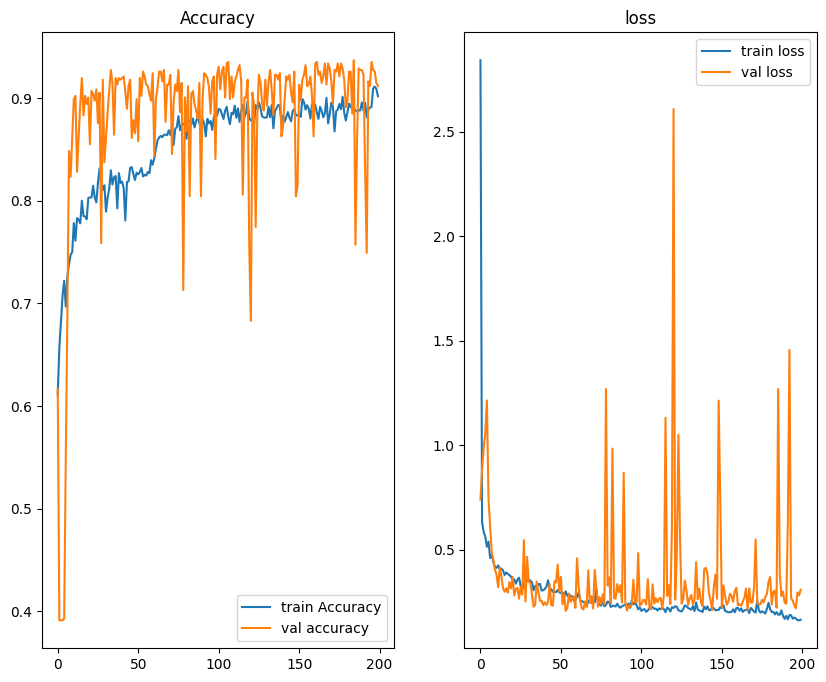

In [9]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label ='train Accuracy')
plt.plot(history.history['val_accuracy'], label= 'val accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('loss')
plt.legend()